In [944]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

import tensorflow as tf
import pickle
import os
import glob
import random
import sys
import datetime
import wispy
import wispy.resnet
import wispy.logger
import wispy.utils
import wispy.callbacks
import wispy.model_utils
from tomlkit import parse
from tensorflow.keras.utils import get_custom_objects
import pugna.activations

plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [945]:
from wispy import lalutils, rotations 

In [946]:
sys.path.append("../")

In [947]:
import fit

In [948]:
get_custom_objects().update({'s2relu': pugna.activations.s2relu})
get_custom_objects().update({'ScaleLayer': wispy.mscalev3.ScaleLayer})

In [949]:
%matplotlib inline

# load models

In [950]:
models = {}

In [951]:
!pwd

/home/sebastian.khan/git/stk/ml/waveforms/aug2021/test-5d


In [952]:
!ls

alpha				      phi_21
amps				      phi_22
angles				      phis
beta				      plot-prediction-waveform.ipynb
compute_preprocessing.toml	      pre_processing
data_generation_coprec_training.toml  run-gen-training.sh
data_generation_coprec_val.toml       run-preproc.sh
data_logs			      training_data
gamma				      validation_data


In [1287]:
glob.glob("../test-5d-1e6/phi_22/009/checkpoint/*")[-1]

'../test-5d-1e6/phi_22/009/checkpoint/cp-00460.ckpt'

In [1288]:
glob.glob("../test-5d-1e6/phi_21/009/checkpoint/*")[-1]

'../test-5d-1e6/phi_21/009/checkpoint/cp-00100.ckpt'

In [1289]:
glob.glob("../test-5d-1e6/amps/009/checkpoint/*")[-1]

'../test-5d-1e6/amps/009/checkpoint/cp-00050.ckpt'

In [1290]:
glob.glob("../test-5d-1e6/alpha/009/checkpoint/*")[-1]

'../test-5d-1e6/alpha/009/checkpoint/cp-00070.ckpt'

In [1291]:
glob.glob("../test-5d-1e6/beta/009/checkpoint/*")[-1]

'../test-5d-1e6/beta/009/checkpoint/cp-00060.ckpt'

In [1292]:
glob.glob("../test-5d-1e6/gamma/009/checkpoint/*")[-1]

'../test-5d-1e6/gamma/009/checkpoint/cp-00060.ckpt'

In [1573]:
models['amps'] = tf.keras.models.load_model('amps/002/model.h5')

models['alpha'] = tf.keras.models.load_model('alpha/002/model.h5')
models['beta'] = tf.keras.models.load_model('beta/002/model.h5')
models['gamma'] = tf.keras.models.load_model('gamma/002/model.h5')

# models['phi_22'] = tf.keras.models.load_model('phi_22/002/model.h5')

# models['phi_22'] = tf.keras.models.load_model('phi_22/007/checkpoint/cp-08000.ckpt')

models['phi_22'] = tf.keras.models.load_model('../test-5d-1e6/phi_22/009/checkpoint/cp-00270.ckpt')



models['phi_21'] = tf.keras.models.load_model('phi_21/002/model.h5')

# models['phis'] = tf.keras.models.load_model('phis/002/model.h5')

In [1574]:
# models['amps'] = tf.keras.models.load_model('../test-5d-1e6/amps/009/checkpoint/cp-00050.ckpt')
# models['alpha'] = tf.keras.models.load_model('../test-5d-1e6/alpha/009/checkpoint/cp-00070.ckpt')
# models['beta'] = tf.keras.models.load_model('../test-5d-1e6/beta/009/checkpoint/cp-00060.ckpt')
# models['gamma'] = tf.keras.models.load_model('../test-5d-1e6/gamma/009/checkpoint/cp-00060.ckpt')
# models['phi_22'] = tf.keras.models.load_model('../test-5d-1e6/phi_22/009/checkpoint/cp-00460.ckpt')
# models['phi_21'] = tf.keras.models.load_model('../test-5d-1e6/phi_21/009/checkpoint/cp-00100.ckpt')

In [1575]:
filename = './training_data/times.npy'
times = np.load(filename)

pkl_filename = './pre_processing/times_scaler.pkl'
with open(pkl_filename, 'rb') as file:
    times_scaler = pickle.load(file)

times_scaled = times_scaler.transform(times[:, np.newaxis])

In [1576]:
preprocparams = dict(np.load('./pre_processing/preprocessing_params.npz'))

In [1577]:
preprocparams

{'alpha': array(32.51488001),
 'amp_21': array(0.09324126),
 'amp_22': array(0.39585552),
 'beta': array(1.88545586),
 'gamma': array(30.98872989),
 'phi_21': array(99.41114908),
 'phi_22': array(162.11471305)}

In [1578]:
# coords_train = np.load("./training_data/coords.npy").T
coords_train = np.load("./validation_data/coords.npy").T

In [1579]:
def get_input_for_ann(times, coords):
    return np.column_stack((times[:, 0], (coords*np.ones(times.shape))))

In [1580]:
get_input_for_ann(times_scaled, coords_train[0])

array([[-1.00000000e+00,  2.75428543e+00,  1.39846034e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.99178982e-01,  2.75428543e+00,  1.39846034e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.98357964e-01,  2.75428543e+00,  1.39846034e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.64203612e-03,  2.75428543e+00,  1.39846034e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.21018062e-04,  2.75428543e+00,  1.39846034e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.55111512e-17,  2.75428543e+00,  1.39846034e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [1581]:
amp22, amp21 = models['amps'].predict(get_input_for_ann(times_scaled, coords_train[0])).T

In [1582]:
amp22.shape

(1219,)

In [1583]:
def predict_model(times_scaled, coords):
    
    X = get_input_for_ann(times_scaled, coords)
    
    amp22, amp21 = models['amps'].predict(X).T
    amp22 = amp22*preprocparams['amp_22']
    amp21 = amp21*preprocparams['amp_21']
    alpha = models['alpha'].predict(X)[:,0]*preprocparams['alpha']
    beta = models['beta'].predict(X)[:,0]*preprocparams['beta']
    gamma = models['gamma'].predict(X)[:,0]*preprocparams['gamma']
    
    phi_22 = models['phi_22'].predict(X)[:,0]*preprocparams['phi_22']
    phi_21 = models['phi_21'].predict(X)[:,0]*preprocparams['phi_21']
#     phi_22, phi_21 = models['phis'].predict(X).T
#     phi_22 = phi_22*preprocparams['phi_22']
#     phi_21 = phi_21*preprocparams['phi_21']
    
    y22_complex = amp22 * np.exp(1.j*phi_22) 
    y21_complex = amp21 * np.exp(1.j*phi_21)
    
    plt.figure()
    plt.plot(times_scaled, np.real(y22_complex))
    plt.plot(times_scaled, np.real(y21_complex))
    
    
#     y22_complex = data['amp_22'][67] * np.exp(1.j*data['phi_22'][67]) 
#     y21_complex = data['amp_21'][67] * np.exp(1.j*data['phi_21'][67])
    
#     y22_complex = amp22 * np.exp(1.j*data['phi_22'][67]) 
#     y21_complex = data['amp_21'][67] * np.exp(1.j*data['phi_21'][67])

#     y22_complex = data['amp_22'][67] * np.exp(1.j*phi_22) 
#     y21_complex = data['amp_21'][67] * np.exp(1.j*data['phi_21'][67])

    
    
    hlms_ann = {}
    hlms_ann[(2,2)] = y22_complex
    hlms_ann[(2,1)] = y21_complex
    hlms_ann[(2,0)] = np.zeros(len(y22_complex))*1.j
    hlms_ann[(2,-1)] = y21_complex.conj().copy()
    hlms_ann[(2,-2)] = y22_complex.conj().copy()
    
    wr_ann = rotations.WaveformRotations(
        times=times,
        hlms=hlms_ann,
        frame='coprec',
        alpha=alpha,
        beta=beta,
        gamma=gamma
    ) 
    
    m1, m2 = phenom.m1_m2_M_q(100, coords[0])
    f_ref = 10.
    phiRef = 0.
    s1x, s1y, s1z = data_generation_coprec.polar_to_cart(coords[1], coords[2], coords[3])
    s2x, s2y, s2z = data_generation_coprec.polar_to_cart(coords[4], coords[5], coords[6])
    
    thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
        mass1=m1, mass2=m2, f_ref=f_ref, inc=0, phiref=phiRef,
        spin1x=s1x, spin1y=s1y, spin1z=s1z,
        spin2x=s2x, spin2y=s2y, spin2z=s2z)
    print(thetaJN, alpha0, phi_aligned)
    
    wr_ann.set_alpha0_thetaJN_phi0(alpha0, thetaJN, phi_aligned)
    
    return wr_ann

In [1584]:
import data_generation_coprec

In [1585]:
data_generation_coprec.polar_to_cart(coords_train[0,1],coords_train[0,2],coords_train[0,3])

(-0.10491603862056662, 0.0902485965618855, -0.02011787773161539)

In [1586]:
import phenom

In [1587]:
phenom.m1_m2_M_q(100, coords_train[0,0])

(73.36377269258962, 26.636227307410376)

In [1588]:
coords_train[0]

array([2.75428543, 0.13984603, 1.71515453, 2.43120767, 0.        ,
       0.        , 0.        ])

In [1589]:
coords_train[:,1].argmax()

978

In [1590]:
coords_train

array([[2.75428543, 0.13984603, 1.71515453, ..., 0.        , 0.        ,
        0.        ],
       [2.60704407, 0.26322307, 1.94164177, ..., 0.        , 0.        ,
        0.        ],
       [1.92279119, 0.27902518, 1.18969502, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.37851471, 0.77422685, 2.35675254, ..., 0.        , 0.        ,
        0.        ],
       [1.36862377, 0.98869349, 0.28741784, ..., 0.        , 0.        ,
        0.        ],
       [1.69836707, 0.81778244, 0.63155538, ..., 0.        , 0.        ,
        0.        ]])

In [1591]:
# np.where((coords_train[:,1] > 0.9) & (coords_train[:,0] > 3.4) & (coords_train[:,2] > 1.4) & (coords_train[:,2] > 2.3))
np.where((coords_train[:,1] > 0.6) & (coords_train[:,1] < 0.8) & (coords_train[:,0] > 3.4) & (coords_train[:,2] > 1.4) & (coords_train[:,2] < 2.3))

(array([ 67,  92, 126, 149, 230, 384, 506, 591, 615, 627, 632, 714, 812,
        817, 892, 959, 979, 990]),)

In [1592]:
coords_train[67]

array([3.453749  , 0.62622349, 1.74419143, 3.45795285, 0.        ,
       0.        , 0.        ])

In [1593]:
# index=-3
# index=coords_train[:,1].argmax()
# index=coords_train[:,0].argmax()
# index=12
# index=44
index=67

In [1594]:
coords_train[index]

array([3.453749  , 0.62622349, 1.74419143, 3.45795285, 0.        ,
       0.        , 0.        ])

0.48255818900628067 1.2246467991473532e-16 2.825232452953044


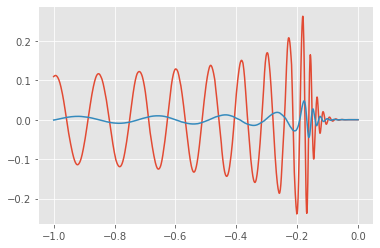

In [1595]:
wr_ann = predict_model(times_scaled, coords_train[index])

In [1596]:
wr_ann

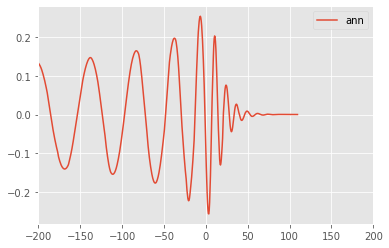

In [1597]:
plt.figure()
plt.plot(times, wr_ann.hlms[(2,2)].real, label='ann')
# plt.xlim(-0.2,0.1)
plt.xlim(-200, 200)
plt.legend()

plt.figure()
plt.plot(times, wr_ann.hlms[(2,2)].imag, label='ann')
# plt.xlim(-0.2,0.1)
plt.xlim(-200, 200)
plt.legend()

In [1598]:
def plot_modes(wr):
    plt.figure()
    plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,1)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,0)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,-1)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,-2)]))
    plt.title(wr.frame)
    plt.show()
    plt.close()

In [1599]:
plot_modes(wr_ann)

In [1600]:
wr_ann.from_coprecessing_frame_to_inertial_frame()

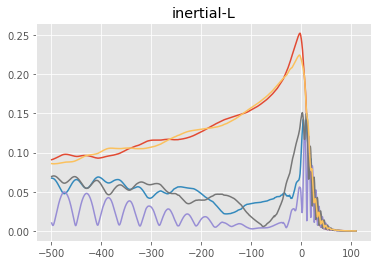

In [1601]:
plot_modes(wr_ann)

# load training data

In [1602]:
# data = {}
# data['amp_22'] = np.load('./training_data/amp_22.npy')
# data['amp_21'] = np.load('./training_data/amp_21.npy')
# data['phi_22'] = np.load('./training_data/phi_22.npy')
# data['phi_21'] = np.load('./training_data/phi_21.npy')
# data['alpha'] = np.load('./training_data/alpha.npy')
# data['beta'] = np.load('./training_data/beta.npy')
# data['gamma'] = np.load('./training_data/gamma.npy')

data = {}
data['amp_22'] = np.load('./validation_data/amp_22.npy')
data['amp_21'] = np.load('./validation_data/amp_21.npy')
data['phi_22'] = np.load('./validation_data/phi_22.npy')
data['phi_21'] = np.load('./validation_data/phi_21.npy')
data['alpha'] = np.load('./validation_data/alpha.npy')
data['beta'] = np.load('./validation_data/beta.npy')
data['gamma'] = np.load('./validation_data/gamma.npy')

In [1603]:
def wr_from_data(coords, i):
    y22_complex = data['amp_22'][i] * np.exp(1.j*data['phi_22'][i]) 
    y21_complex = data['amp_21'][i] * np.exp(1.j*data['phi_21'][i])
    
    plt.figure()
    plt.plot(times_scaled, np.real(y22_complex))
    plt.plot(times_scaled, np.real(y21_complex))
    
    
    hlms = {}
    hlms[(2,2)] = y22_complex
    hlms[(2,1)] = y21_complex
    hlms[(2,0)] = np.zeros(len(y22_complex))*1.j
    hlms[(2,-1)] = y21_complex.conj().copy()
    hlms[(2,-2)] = y22_complex.conj().copy()
    
    wr = rotations.WaveformRotations(
        times=times,
        hlms=hlms,
        frame='coprec',
        alpha=data['alpha'][i],
        beta=data['beta'][i],
        gamma=data['gamma'][i]
    ) 
    
    m1, m2 = phenom.m1_m2_M_q(100, coords[0])
    f_ref = 10.
    phiRef = 0.
    s1x, s1y, s1z = data_generation_coprec.polar_to_cart(coords[1], coords[2], coords[3])
    s2x, s2y, s2z = data_generation_coprec.polar_to_cart(coords[4], coords[5], coords[6])
    
    thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
        mass1=m1, mass2=m2, f_ref=f_ref, inc=0, phiref=phiRef,
        spin1x=s1x, spin1y=s1y, spin1z=s1z,
        spin2x=s2x, spin2y=s2y, spin2z=s2z)
    print(thetaJN, alpha0, phi_aligned)
    
    wr.set_alpha0_thetaJN_phi0(alpha0, thetaJN, phi_aligned)
    
    return wr

0.48255818900628067 1.2246467991473532e-16 2.825232452953044


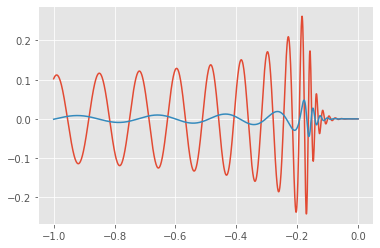

In [1604]:
wr_data = wr_from_data(coords_train[index], index)

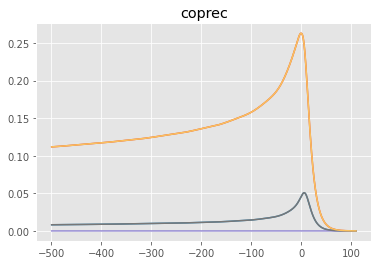

In [1605]:
plot_modes(wr_data)

In [1606]:
wr_data.from_coprecessing_frame_to_inertial_frame()

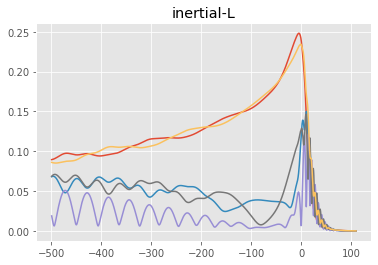

In [1607]:
plot_modes(wr_data)

In [1608]:
# wr_data.from_coprecessing_frame_to_inertial_frame()
# wr_ann.from_coprecessing_frame_to_inertial_frame()

In [1609]:
# wr_data.from_inertial_frame_to_coprecessing_frame()
# wr_ann.from_inertial_frame_to_coprecessing_frame()

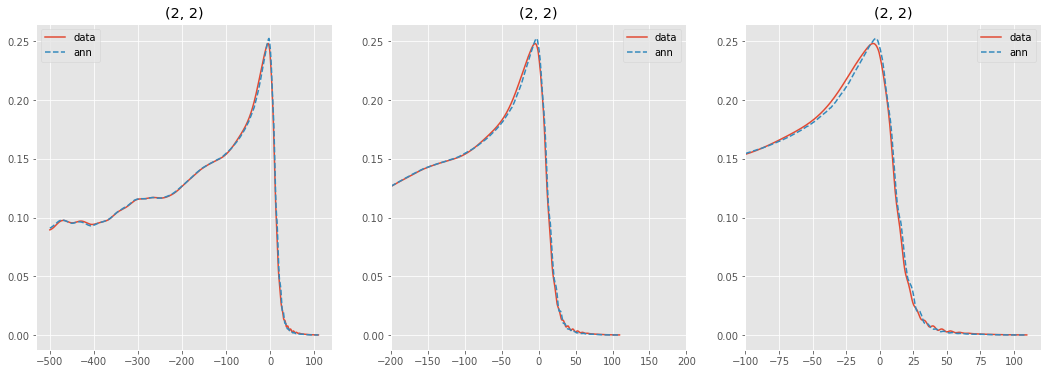

In [1610]:
for key in wr_data.hlms.keys():
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(times, np.abs(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.abs(wr_ann.hlms[key]), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(times, np.abs(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.abs(wr_ann.hlms[key]), label='ann',ls='--')
    plt.xlim(-200, 200)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(times, np.abs(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.abs(wr_ann.hlms[key]), label='ann',ls='--')
    plt.xlim(-100, 120)
    plt.title(key)
    plt.legend()

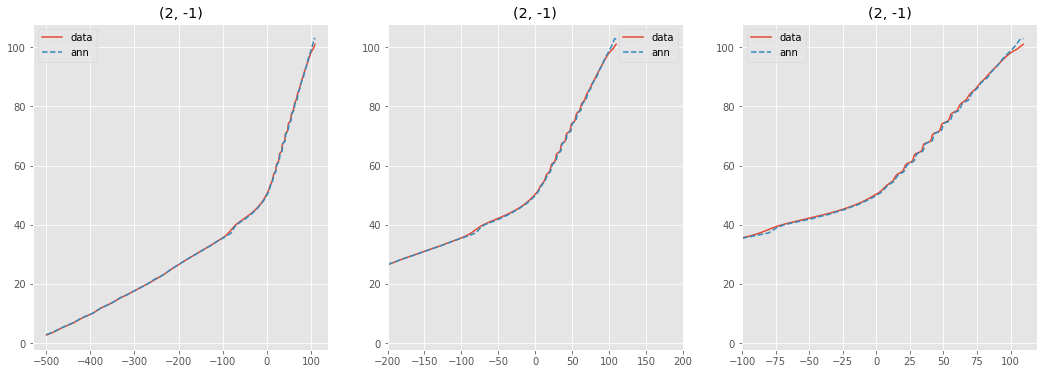

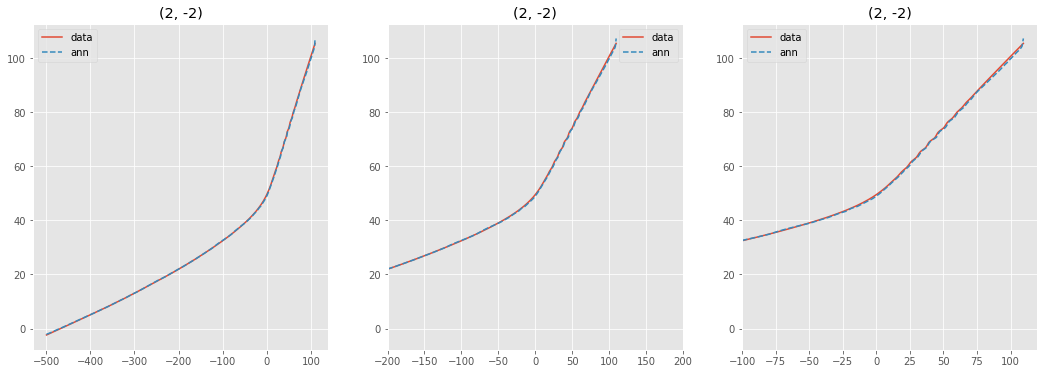

In [1611]:
for key in wr_data.hlms.keys():
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(times, np.unwrap(np.angle(wr_data.hlms[key])), label='data' )
    plt.plot(times, np.unwrap(np.angle(wr_ann.hlms[key])), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(times, np.unwrap(np.angle(wr_data.hlms[key])), label='data' )
    plt.plot(times, np.unwrap(np.angle(wr_ann.hlms[key])), label='ann',ls='--')
    plt.xlim(-200, 200)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(times, np.unwrap(np.angle(wr_data.hlms[key])), label='data' )
    plt.plot(times, np.unwrap(np.angle(wr_ann.hlms[key])), label='ann',ls='--')
    plt.xlim(-100, 120)
    plt.title(key)
    plt.legend()

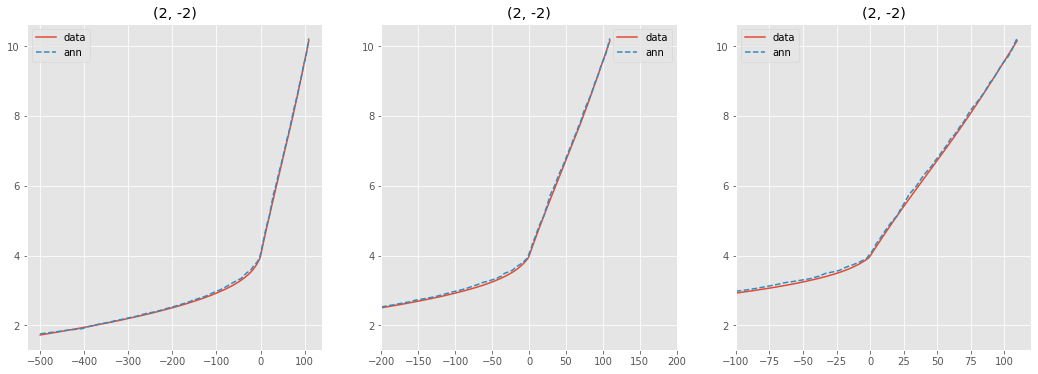

In [1612]:

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(times, np.abs(wr_data.alpha), label='data' )
plt.plot(times, np.abs(wr_ann.alpha), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
plt.title(key)
plt.legend()

plt.subplot(1,3,2)
plt.plot(times, np.abs(wr_data.alpha), label='data' )
plt.plot(times, np.abs(wr_ann.alpha), label='ann',ls='--')
plt.xlim(-200, 200)
plt.title(key)
plt.legend()

plt.subplot(1,3,3)
plt.plot(times, np.abs(wr_data.alpha), label='data' )
plt.plot(times, np.abs(wr_ann.alpha), label='ann',ls='--')
plt.xlim(-100, 120)
plt.title(key)
plt.legend()

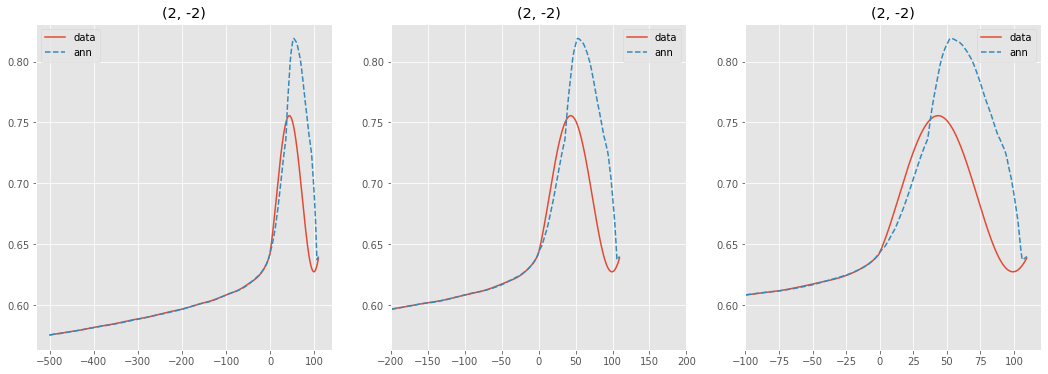

In [1613]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(times, np.abs(wr_data.beta), label='data' )
plt.plot(times, np.abs(wr_ann.beta), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
plt.title(key)
plt.legend()

plt.subplot(1,3,2)
plt.plot(times, np.abs(wr_data.beta), label='data' )
plt.plot(times, np.abs(wr_ann.beta), label='ann',ls='--')
plt.xlim(-200, 200)
plt.title(key)
plt.legend()

plt.subplot(1,3,3)
plt.plot(times, np.abs(wr_data.beta), label='data' )
plt.plot(times, np.abs(wr_ann.beta), label='ann',ls='--')
plt.xlim(-100, 120)
plt.title(key)
plt.legend()

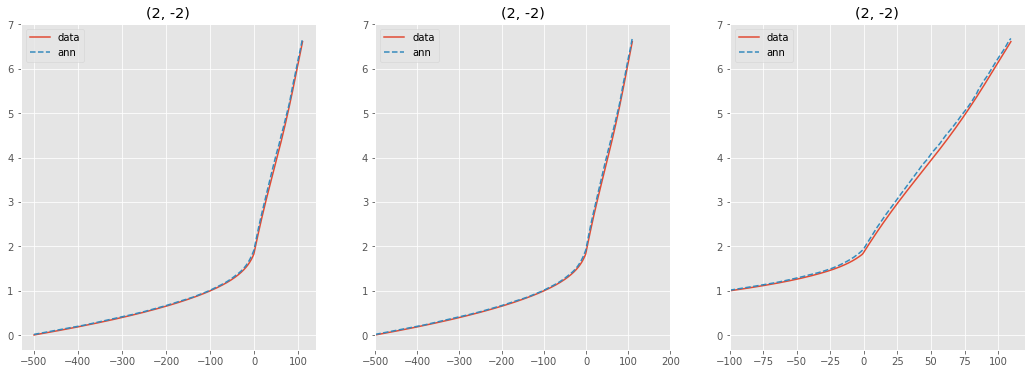

In [1614]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(times, np.abs(wr_data.gamma), label='data' )
plt.plot(times, np.abs(wr_ann.gamma), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
plt.title(key)
plt.legend()

plt.subplot(1,3,2)
plt.plot(times, np.abs(wr_data.gamma), label='data' )
plt.plot(times, np.abs(wr_ann.gamma), label='ann',ls='--')
plt.xlim(-500, 200)
plt.title(key)
plt.legend()

plt.subplot(1,3,3)
plt.plot(times, np.abs(wr_data.gamma), label='data' )
plt.plot(times, np.abs(wr_ann.gamma), label='ann',ls='--')
plt.xlim(-100, 120)
plt.title(key)
plt.legend()

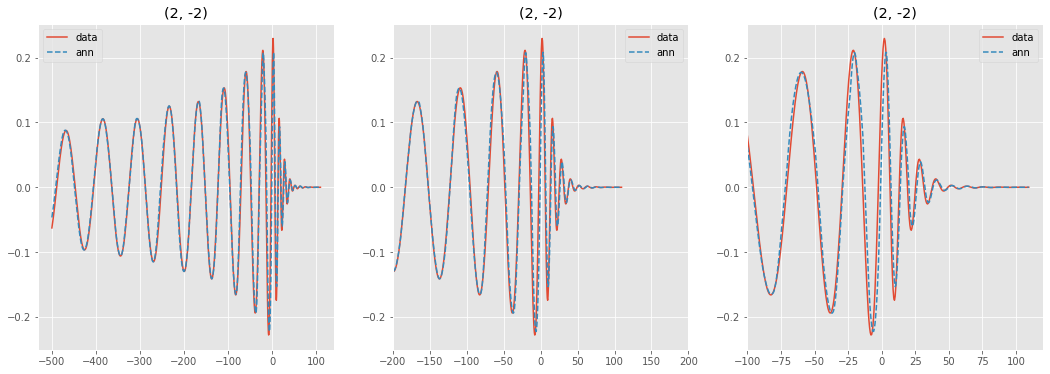

In [1615]:
for key in wr_data.hlms.keys():
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(times, np.real(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.real(wr_ann.hlms[key]), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(times, np.real(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.real(wr_ann.hlms[key]), label='ann',ls='--')
    plt.xlim(-200, 200)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(times, np.real(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.real(wr_ann.hlms[key]), label='ann',ls='--')
    plt.xlim(-100, 120)
    plt.title(key)
    plt.legend()

In [1616]:
wr_data.from_inertial_frame_to_coprecessing_frame()
wr_ann.from_inertial_frame_to_coprecessing_frame()

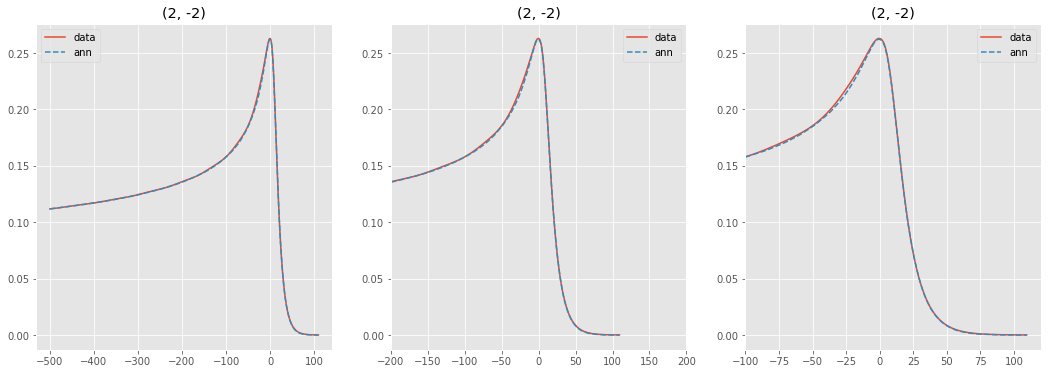

In [1617]:
for key in wr_data.hlms.keys():
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(times, np.abs(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.abs(wr_ann.hlms[key]), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(times, np.abs(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.abs(wr_ann.hlms[key]), label='ann',ls='--')
    plt.xlim(-200, 200)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(times, np.abs(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.abs(wr_ann.hlms[key]), label='ann',ls='--')
    plt.xlim(-100, 120)
    plt.title(key)
    plt.legend()

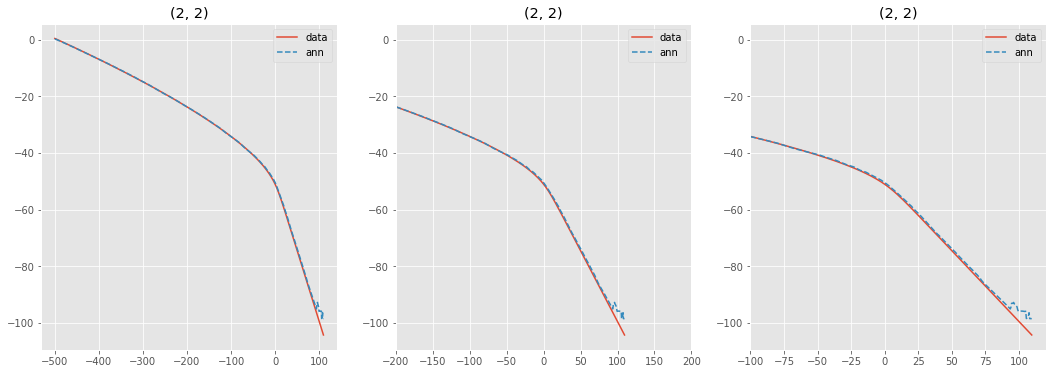

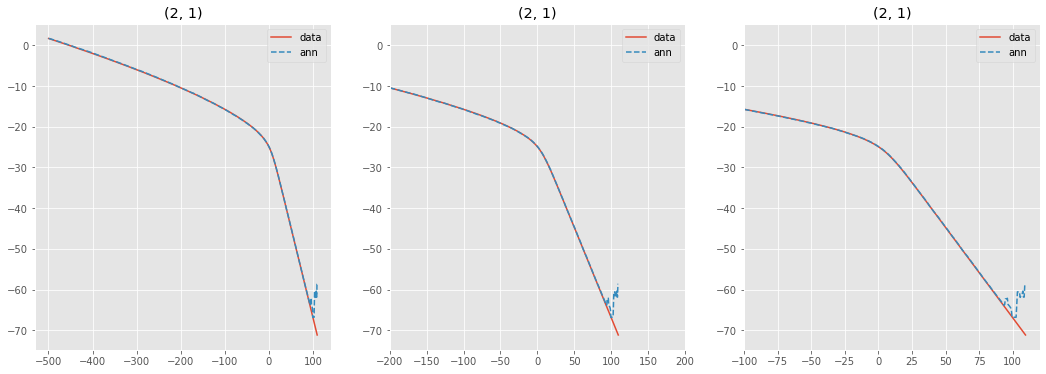

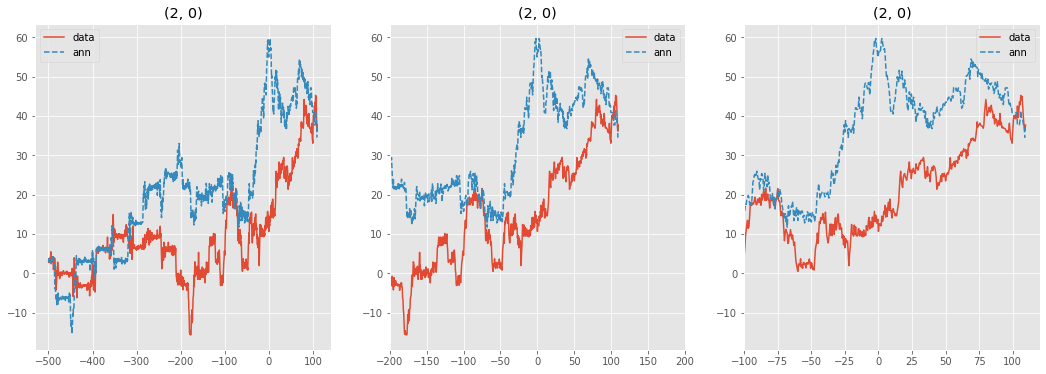

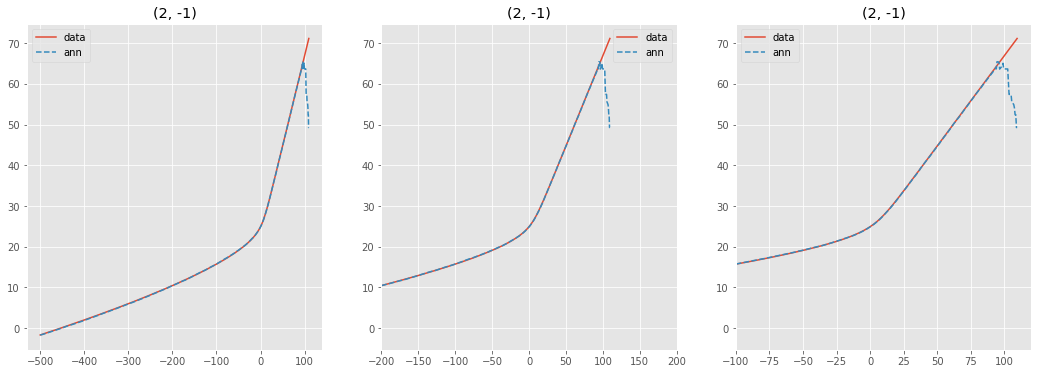

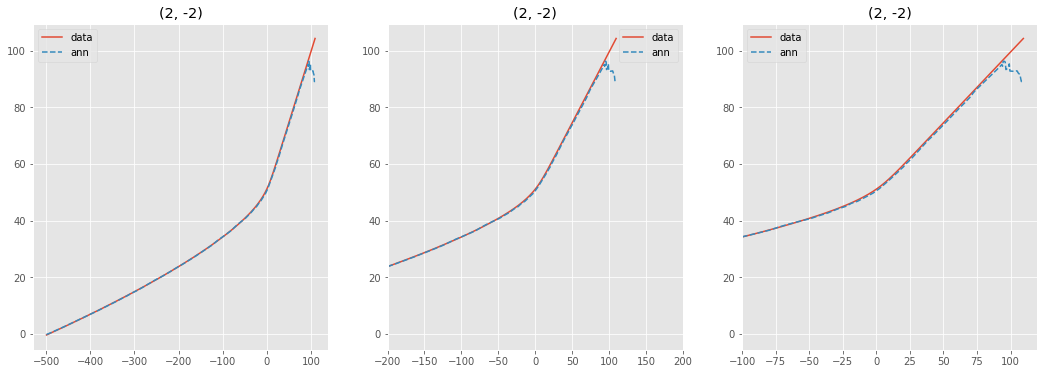

In [1618]:
for key in wr_data.hlms.keys():
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(times, np.unwrap(np.angle(wr_data.hlms[key])), label='data' )
    plt.plot(times, np.unwrap(np.angle(wr_ann.hlms[key])), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(times, np.unwrap(np.angle(wr_data.hlms[key])), label='data' )
    plt.plot(times, np.unwrap(np.angle(wr_ann.hlms[key])), label='ann',ls='--')
    plt.xlim(-200, 200)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(times, np.unwrap(np.angle(wr_data.hlms[key])), label='data' )
    plt.plot(times, np.unwrap(np.angle(wr_ann.hlms[key])), label='ann',ls='--')
    plt.xlim(-100, 120)
    plt.title(key)
    plt.legend()

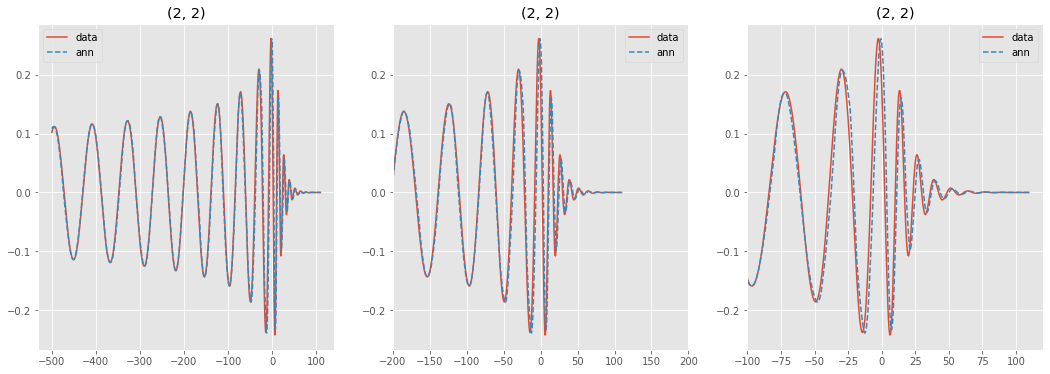

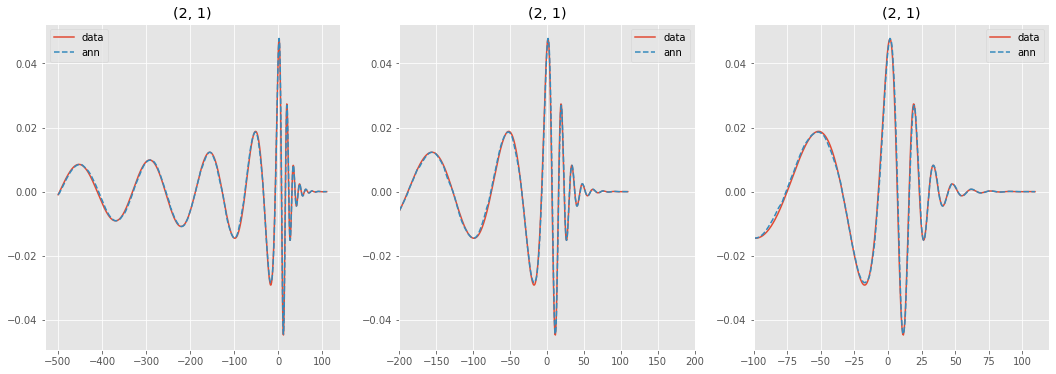

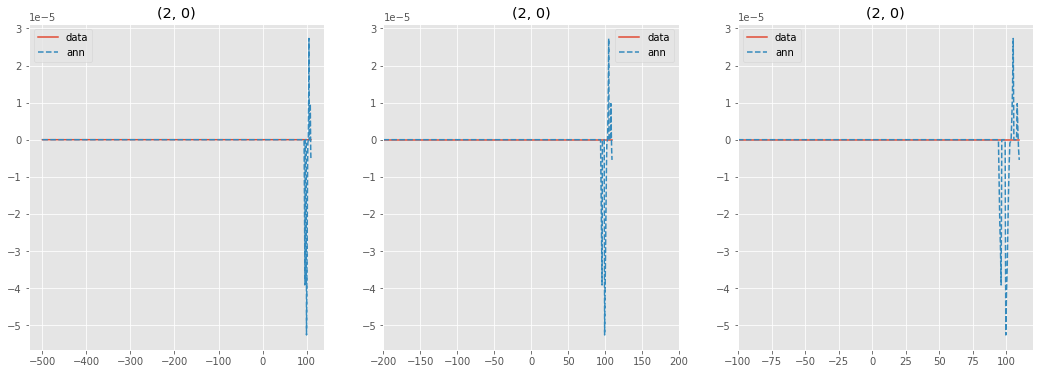

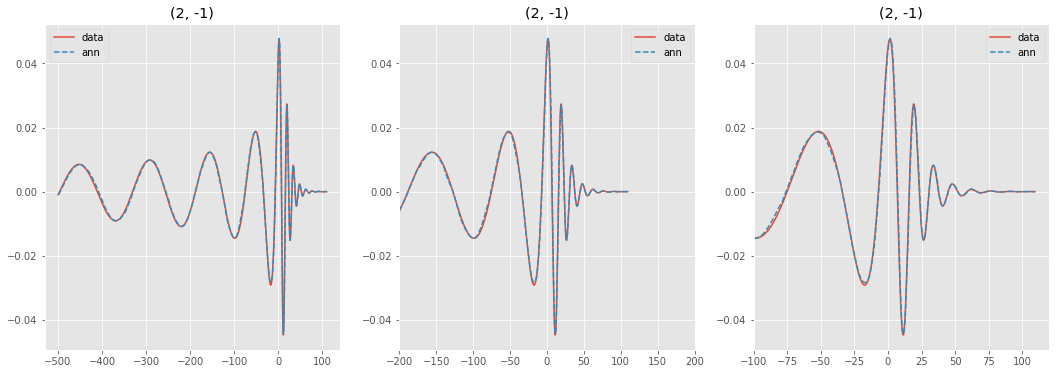

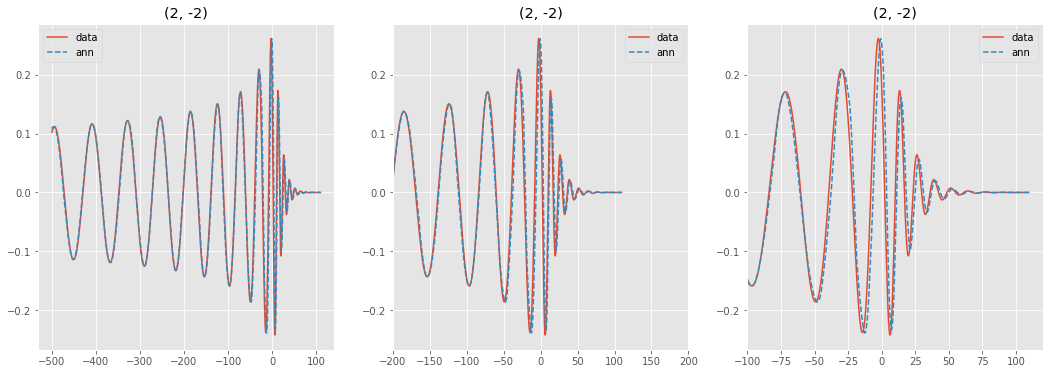

In [1620]:
for key in wr_data.hlms.keys():
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(times, np.real(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.real(wr_ann.hlms[key]), label='ann', ls='--')
#     plt.xlim(-0.5,0.1)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(times, np.real(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.real(wr_ann.hlms[key]), label='ann',ls='--')
    plt.xlim(-200, 200)
    plt.title(key)
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(times, np.real(wr_data.hlms[key]), label='data' )
    plt.plot(times, np.real(wr_ann.hlms[key]), label='ann',ls='--')
    plt.xlim(-100, 120)
    plt.title(key)
    plt.legend()